In [1]:
path = './final_output/speeches_097/PMI_pos_norm.npz.npy'

In [2]:
import numpy as np

In [3]:
pmi_norm = np.load(path)

In [4]:
pmi_norm

array([[1.        , 0.        , 0.        , ..., 0.        , 0.18003101,
        0.20544892],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [14]:
np.mean(pmi_norm[0:5], axis = 0).shape

(9344,)

In [15]:
sentence_a = "Achilles' wrath, to Greece the direful spring Of woes unnumber'd, heavenly goddess, sing!"
sentence_b = "That wrath which hurl'd to Pluto's gloomy reign The souls of mighty chiefs untimely slain; Whose limbs unburied on the naked shore, Devouring dogs and hungry vultures tore."

In [31]:
def clean_sentence(sentence):
    lower = sentence.lower()
    cleaned = text_process(lower)
    return cleaned
    

In [29]:
import string
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    no_stopwords = ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])
    
    cleaned = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(no_stopwords)])
    
    return cleaned

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mistryds\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [74]:
def calc_score(sentence_a, sentence_b):
    s = 0
    pairs = 0
    for word_1 in word_tokenize(clean_sentence(sentence_a)):
        for word_2 in word_tokenize(clean_sentence(sentence_b)):
            x = d.token2id.get(word_1,-1)
            y = d.token2id.get(word_2,-1)
            if x == -1 or y == -1:
                continue
    #         print(pmi_norm[x][y])
            s += pmi_norm[x][y]
            pairs += 1
    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.true_divide(s, pairs)
    return c
    

In [54]:
calc_score(sentence_a, sentence_b)

0.0326195964739327

In [56]:
with open('./Pipeline_output/speeches_097/alex pope iliad_cleaned_cleaned.txt', 'r') as f:
    all_text = f.read()
    f.close()

In [61]:
all_sentences = [line for line in all_text.split('\n') if len(line)>0]

In [63]:
def final(all_sentences, k):
    successive = []
    for i in range(len(all_sentences) - k):
        successive.append(calc_score(all_sentences[i], all_sentences[i+k]))
    return successive

In [75]:
maybe = final(all_sentences, 1)

In [67]:
d.token2id.get('argo',0)

0

In [79]:
import seaborn as sns

<AxesSubplot:>

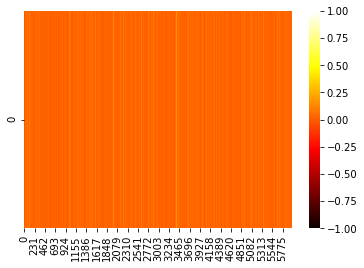

In [89]:
sns.heatmap([maybe], cmap='hot', vmin = -1, vmax = 1)

In [82]:
import matplotlib.pyplot as plt

In [90]:
import networkx as nx

In [91]:
G = nx.from_numpy_matrix(pmi_norm)

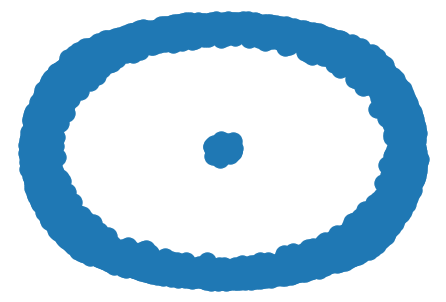

In [96]:
nx.draw(G)

In [94]:
G_10 = nx.from_numpy_matrix(pmi_norm[:10])

NetworkXError: Adjacency matrix not square: nx,ny=(10, 9344)

In [118]:
A  =  [[2.000000,  0.0000000,  0.0000000,  0.0000000,  0.05119703, 1.3431599], 
	   [0.000000,  0.0000000, -0.6088082,  0.4016954,  0.00000000, 0.6132168], 
       [0.000000, -0.6088082,  0.0000000,  0.0000000, -0.63295415, 0.0000000], 
       [0.000000,  0.4016954,  0.0000000,  0.0000000, -0.29831267, 0.0000000], 
       [0.051197,  0.0000000, -0.6329541, -0.2983127,  0.00000000, 0.1562458], 
       [1.343159,  0.6132168,  0.0000000,  0.0000000,  0.15624584, 0.0000000]] 

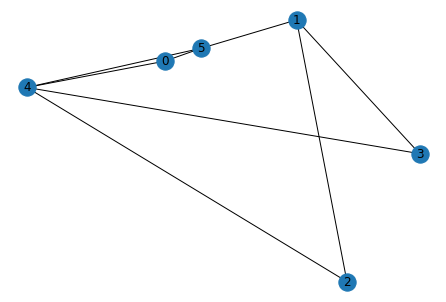

In [119]:
B = nx.from_numpy_matrix(np.array(A))  
nx.draw(B, with_labels=True) 

In [1]:
a = "Thus Chryses pray'd.--the favouring power attends, And from Olympus' lofty tops descends."

In [2]:
import re

In [3]:
pat1 = re.compile('[\s]+')
pat2 = re.compile('[^a-zA-Z0-9 ]+')

In [4]:
doc = pat2.sub('', a)
doc = pat1.sub(' ', doc)

In [5]:
doc

'Thus Chryses praydthe favouring power attends And from Olympus lofty tops descends'

In [46]:
s/(len(sentence_a)+len(sentence_b))

0.02499585936699824

In [36]:
clean_sentence(sentence_b)

'wrath hurld pluto gloomy reign soul mighty chief untimely slain whose limb unburied naked shore devour dog hungry vulture tore'

In [5]:
print(pmi_norm[0])

[1.         0.         0.         ... 0.         0.18003101 0.20544892]


In [16]:
dictionary_path = './Reference/global_dictionary_HD.pkl'

In [17]:
import pickle

In [18]:
fname = open(dictionary_path, 'rb')

In [19]:
d = pickle.load(fname)

In [39]:
d.token2id['hurld']

4071

In [38]:
d.token2id

{'a': 0,
 'abandond': 1,
 'abantes': 2,
 'abantian': 3,
 'abas': 4,
 'abashd': 5,
 'abate': 6,
 'abhorrd': 7,
 'abhors': 8,
 'abject': 9,
 'abjures': 10,
 'able': 11,
 'ablerus': 12,
 'ablest': 13,
 'ablutions': 14,
 'abode': 15,
 'abodes': 16,
 'abounding': 17,
 'about': 18,
 'above': 19,
 'abroad': 20,
 'absence': 21,
 'absent': 22,
 'absorbing': 23,
 'abstain': 24,
 'abstemious': 25,
 'abused': 26,
 'abydos': 27,
 'abyss': 28,
 'abysses': 29,
 'acamas': 30,
 'accent': 31,
 'accents': 32,
 'accept': 33,
 'accepting': 34,
 'access': 35,
 'acclaim': 36,
 'acclamations': 37,
 'accomplish': 38,
 'accord': 39,
 'accords': 40,
 'accosted': 41,
 'accosts': 42,
 'accursed': 43,
 'accused': 44,
 'accuses': 45,
 'accustomd': 46,
 'achaia': 47,
 'achaian': 48,
 'achaians': 49,
 'achelous': 50,
 'achieved': 51,
 'achievement': 52,
 'achievements': 53,
 'achilles': 54,
 'aching': 55,
 'acquire': 56,
 'acquired': 57,
 'acres': 58,
 'across': 59,
 'act': 60,
 'actaea': 61,
 'acted': 62,
 'acting': 

In [20]:
a, b = 1500, 2000
for i in range(a,b):
    print(d[i])

clustering
clusters
clymene
clytaemnestras
clytius
clytomedes
clytus
coagulates
coaids
coals
coan
coast
coasts
coeranus
coerulean
coffer
cohorts
cold
coldest
collect
collected
collecting
collects
colour
colourd
colours
column
columns
combat
combatants
combats
combine
combined
come
comelier
comely
comes
comest
comet
comets
comfort
comfortless
coming
command
commander
commanding
commands
commence
commenced
commencing
commend
commends
commerce
commission
commissiond
commit
commits
common
communed
commutual
compact
compacted
companion
companions
compare
compared
compass
compassd
compassion
compeer
compel
compelld
complain
complains
complaints
complete
completely
compliant
comply
compose
composed
comprehensive
compressd
comrade
comrades
comst
concave
conceal
conceald
conceals
conceived
concern
conclude
concluded
concludes
conclusive
concurring
condemn
condemnd
condemns
condense
condensed
condensing
condition
conditions
conducive
conduct
conducts
cone
confederate
confederates
conference
conf

In [80]:
sentence = "For Chryses sought with costly gifts to gain His captive daughter from the victor’s chain."

In [22]:
sentence = sentence.lower()

In [25]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mistryds\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mistryds\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mistryds\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [26]:
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [27]:
lemmatizer = WordNetLemmatizer()

In [31]:
print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(sentence) if w not in stopwords])

['for', 'chryses', 'sought', 'with', 'costly', 'gift', 'to', 'gain', 'his', 'captive', 'daughter', 'from', 'the', 'victor', '’', 's', 'chain', '.']


In [32]:
x, y = d.token2id['chryses'], d.token2id['sought']

In [36]:
d.token2id['with']

9190

In [30]:
from nltk.corpus import stopwords

In [38]:
stop_words = set(stopwords.words('english'))

In [81]:
dummy = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(sentence)])

In [82]:
dummy

'For Chryses sought with costly gift to gain His captive daughter from the victor ’ s chain .'

In [83]:
# arr = np.zeros(len(d.token2id),)
out = []
for i, char in enumerate(dummy.split()):
    if char in d.token2id:
        print(pmi_norm[d.token2id[char]])
        out.append(pmi_norm[d.token2id[char]])
#         arr = np.append(arr, pmi_norm[d.token2id[char]], axis = 1)

[0. 0. 0. ... 0. 0. 0.]
[0.         0.         0.         ... 0.         0.08133138 0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.         0.         ... 0.         0.04690485 0.        ]
[0.         0.         0.         ... 0.         0.0178425  0.04019641]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [77]:
out

[]

In [48]:
import seaborn as sns

In [86]:
np.mean(out, axis = 0).shape

(9344,)

In [54]:
fname = './Pipeline_output/speeches_097/alex pope iliad_cleaned_cleaned.txt'

In [55]:
def get_data(fname):
    with open(fname, 'r') as f:
        all = f.read()
    return all

In [93]:
all_embeddings = []
index = 0
for sentence in get_data(fname).split('\n'):
    if index == 5989 or index == 398:
        continue
    sentence = sentence.lower()
    out = []
    dummy = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(sentence)])
    for i, char in enumerate(dummy.split()):
        if char in d.token2id:
#             print(pmi_norm[d.token2id[char]])
            out.append(pmi_norm[d.token2id[char]])
    print(index, np.mean(out, axis = 0).shape)
    index += 1
    all_embeddings.append(np.mean(out, axis = 0))

0 (9344,)
1 (9344,)
2 (9344,)
3 (9344,)
4 (9344,)
5 (9344,)
6 (9344,)
7 (9344,)
8 (9344,)
9 (9344,)
10 (9344,)
11 (9344,)
12 (9344,)
13 (9344,)
14 (9344,)
15 (9344,)
16 (9344,)
17 (9344,)
18 (9344,)
19 (9344,)
20 (9344,)
21 (9344,)
22 (9344,)
23 (9344,)
24 (9344,)
25 (9344,)
26 (9344,)
27 (9344,)
28 (9344,)
29 (9344,)
30 (9344,)
31 (9344,)
32 (9344,)
33 (9344,)
34 (9344,)
35 (9344,)
36 (9344,)
37 (9344,)
38 (9344,)
39 (9344,)
40 (9344,)
41 (9344,)
42 (9344,)
43 (9344,)
44 (9344,)
45 (9344,)
46 (9344,)
47 (9344,)
48 (9344,)
49 (9344,)
50 (9344,)
51 (9344,)
52 (9344,)
53 (9344,)
54 (9344,)
55 (9344,)
56 (9344,)
57 (9344,)
58 (9344,)
59 (9344,)
60 (9344,)
61 (9344,)
62 (9344,)
63 (9344,)
64 (9344,)
65 (9344,)
66 (9344,)
67 (9344,)
68 (9344,)
69 (9344,)
70 (9344,)
71 (9344,)
72 (9344,)
73 (9344,)
74 (9344,)
75 (9344,)
76 (9344,)
77 (9344,)
78 (9344,)
79 (9344,)
80 (9344,)
81 (9344,)
82 (9344,)
83 (9344,)
84 (9344,)
85 (9344,)
86 (9344,)
87 (9344,)
88 (9344,)
89 (9344,)
90 (9344,)
91 (9344,

In [92]:
get_data(fname)[398]

'r'

In [89]:
all_np = np.asanyarray(all_embeddings)

C:\Users\mistryds\Miniconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [64]:
sns.heatmap(all_embeddings)

C:\Users\mistryds\Miniconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


IndexError: Inconsistent shape between the condition and the input (got (5990, 1) and (5990,))